# 1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [1]:
import numpy as np
import pandas as pd
import os
os.chdir('C:\\Users\\arpit\Desktop\Spring 18\Python\Week2 and 3')
batting = pd.read_csv('Batting.csv')
batting['IBB'].fillna(0,inplace=True)
batting['HBP'].fillna(0,inplace=True)
batting['SF'].fillna(0,inplace=True)
batting['SH'].fillna(0,inplace=True)
batting['GIDP'].fillna(0,inplace=True)

# 2)	Print out the dimensions and info about the dataframe you just created

In [2]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          102816 non-null float64
HBP          102816 non-null float64
SH           102816 non-null float64
SF           102816 non-null float64
GIDP         102816 non-null f

In [3]:
batting['namefull'] = batting['nameFirst']+" "+batting['nameLast']
batting.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,namefull
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Frank Abercrombie
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,8.0,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,Bob Addy
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,3.0,1.0,2,5.0,0.0,0.0,0.0,0.0,0.0,Art Allison
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,1.0,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,Doug Allison
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,6.0,2.0,2,1.0,0.0,0.0,0.0,0.0,0.0,Cap Anson


# 3)	How many players have hit 40 or more HRs in one single season? 

In [4]:
batting_1=batting[batting['HR'] >= 40].groupby(['playerID','yearID']).sum()
batting_2=batting_1.reset_index()
Player_list=batting_2['playerID'].unique()
result=len(Player_list)
result

142

# 4)	How many players have hit more than 600 HRs for their career?

In [5]:
data=batting[batting['HR'] >= 0].groupby(['playerID','namefull']).sum()
#print(data)
data.reset_index(inplace = True)
data[data['HR'] > 600].groupby(['playerID','namefull']).agg({'HR':'sum'}).reset_index()
#data[data['HR'] > 600]['playerID']

,playerID,namefull,HR
0,aaronha01,Hank Aaron,755
1,bondsba01,Barry Bonds,762
2,griffke02,Ken Griffey,630
3,mayswi01,Willie Mays,660
4,rodrial01,Alex Rodriguez,696
5,ruthba01,Babe Ruth,714
6,sosasa01,Sammy Sosa,609
7,thomeji01,Jim Thome,612


# 5) How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [6]:
#batting[(batting['2B']==40) & (batting['3B']==10)].groupby(['yearID','playerID']).sum()
batting_1=batting[(batting['2B']>=40)&(batting['3B']>=10)&(batting['H']>=200)&(batting['HR']>=30)].groupby(['yearID','playerID','namefull']).agg({'2B':'sum','3B':'sum','H':'sum','HR':'sum'}).reset_index()
batting_count=batting_1['playerID'].nunique()
batting_count

11

# 6)	How many players have had 100 or more SBs in a season? (Dataframe)

In [9]:
batting[batting['SB'] >= 100].groupby(['playerID','namefull','yearID']).agg({'SB':'sum'}).reset_index()

,playerID,namefull,yearID,SB
0,brocklo01,Lou Brock,1974,118.0
1,brownpe01,Pete Browning,1887,103.0
2,brownto01,Tom Brown,1891,106.0
3,colemvi01,Vince Coleman,1985,110.0
4,colemvi01,Vince Coleman,1986,107.0
5,colemvi01,Vince Coleman,1987,109.0
6,comisch01,Charlie Comiskey,1887,117.0
7,fogarji01,Jim Fogarty,1887,102.0
8,hamilbi01,Billy Hamilton,1889,111.0
9,hamilbi01,Billy Hamilton,1890,102.0


# 7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [10]:
temp_data=batting[(batting['yearID'] >= 1960) & (batting['yearID'] < 1970)]
#temp_data[temp_data['HR']>200].count()
temp_data[(temp_data['HR'] >200)].groupby(['playerID']).agg({'HR':'sum'})


HR    0
dtype: int64

# 8)	Who has hit the most HRs in history? (Dataframe)

In [11]:
batting.groupby(['playerID','namefull']).agg({'HR' : 'sum'}).nlargest(1,'HR')

,,HR
playerID,namefull,
bondsba01,Barry Bonds,762


# 9)	Who had the most hits in the 1970s? (Dataframe)

In [12]:
batting[(batting['yearID']>=1970) & (batting['yearID'] < 1980)].groupby(['playerID','namefull']).agg({'H' : 'sum'}).nlargest(1,'H')

,,H
playerID,namefull,
rosepe01,Pete Rose,2045


# 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [13]:
batting['PA']=batting['AB']+batting['BB']+batting['IBB']+batting['SH']+batting['SF']
batting['OBP'] =(batting['H']+batting['IBB']+batting['HBP'])/(batting['AB']+batting['IBB']+batting['HBP']+batting['SF']+batting['SH'])
batting[(batting['PA'] >= 500) & (batting['yearID'] == 1977)].groupby(['namefull','playerID']).agg({'OBP' : 'sum'}).nlargest(5,'OBP')

,,OBP
namefull,playerID,
Rod Carew,carewro01,0.401562
Dave Parker,parkeda01,0.355522
Ted Simmons,simmote01,0.349177
Ken Singleton,singlke01,0.342908
Lyman Bostock,bostoly01,0.342020


# 11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)


In [14]:
batting['Average']=batting['H']/batting['AB']
batting[(batting['PA'] >= 300) & (batting['yearID'] == 2013)].groupby(['namefull','playerID']).agg({'Average' : 'max'}).nlargest(8,'Average').reset_index()

,namefull,playerID,Average
0,Miguel Cabrera,cabremi01,0.347748
1,Hanley Ramirez,ramirha01,0.345395
2,Michael Cuddyer,cuddymi01,0.331288
3,Joe Mauer,mauerjo01,0.323596
4,Mike Trout,troutmi01,0.322581
5,Chris Johnson,johnsch05,0.321012
6,Freddie Freeman,freemfr01,0.319419
7,Yasiel Puig,puigya01,0.319372


# 12)	Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [15]:
batting_H=batting[(batting['yearID']>=1940) & (batting['yearID']<=1949) ].groupby(['playerID','yearID']).agg({'H' : 'max'}).reset_index()
batting_H[batting_H['H']>200].reset_index()

,index,playerID,yearID,H
0,889,cramedo01,1940,200
1,1119,dillibo01,1948,207
2,2189,holmeto01,1945,224
3,3175,mccosba01,1940,200
4,3379,mitchda01,1948,204
5,3380,mitchda01,1949,203
6,3508,musiast01,1943,220
7,3510,musiast01,1946,228
8,3512,musiast01,1948,230
9,3513,musiast01,1949,207


# 13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [32]:
temp_total_hit=batting[batting['HR']>0].groupby(['playerID','namefull','yearID']).agg({'H':'sum'}).reset_index()
#temp_total_hit
temp_list=[]
temp_df=pd.DataFrame()
for i in batting['yearID'].unique():
    a=pd.DataFrame(temp_total_hit[temp_total_hit['yearID']==i].groupby(['namefull']).agg({'H':'max','yearID':'unique'})).nlargest(1,'H')
    #print(type(a['yearID']))
    temp_df=temp_df.append(a)
temp_df.reset_index(inplace=True)
print(temp_df['namefull'].value_counts())
    #print(temp_df)
#print(temp_df['namefull'])
#batting.groupby(['playerID']).agg({'H':'sum'}).nlargest(1,'H')
#a['namefull'].value_counts()

Ichiro Suzuki           6
Ty Cobb                 5
Stan Musial             5
Tony Gwynn              4
Ross Barnes             4
Nap Lajoie              3
Pete Rose               3
Kirby Puckett           3
Dan Brouthers           3
Hank Aaron              2
Shoeless Joe Jackson    2
Dante Bichette          2
Willie Keeler           2
Derek Jeter             2
Jose Altuve             2
George Burns            2
Cap Anson               2
Paul Molitor            2
Paul Waner              2
Rogers Hornsby          2
Tommy Holmes            2
George Brett            2
Chuck Klein             2
Jesse Burkett           2
Rod Carew               2
Vada Pinson             2
Felipe Alou             2
Richie Ashburn          2
Frankie Frisch          1
Sam Thompson            1
                       ..
Harry Heilmann          1
Paul Hines              1
Billy Williams          1
Al Kaline               1
Bobby Veach             1
Rickey Henderson        1
Dave Cash               1
Harvey Kuenn

# 14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [17]:
batting.groupby(['playerID','namefull']).agg({'G':'sum'}).nlargest(5,'G')

,G
playerID,
rosepe01,3562
yastrca01,3308
aaronha01,3298
henderi01,3081
cobbty01,3035


#  15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?

In [18]:
data=batting.groupby(['playerID']).agg({'H':'sum','HR':'sum'})
data.reset_index(inplace=True)
data[(data['H']>3000) & (data['HR']>=500) ].shape[0]

5

# 16) How many HRs were hit during the entire 1988 season? 

In [19]:
batting[batting['yearID']==1988].agg({'HR':'sum'})

HR    3180
dtype: int64

# 17) Top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs

In [20]:
#batting['Batting Average'] = batting['H'] / batting['AB']
batting[(batting['namefull']=='Wade Boggs') & (batting['AB']>=500)].nlargest(3,'Average')

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,SO,IBB,HBP,SH,SF,GIDP,namefull,PA,OBP,Average
62316,boggswa01,Wade,Boggs,1958,1985,1,BOS,AL,161,653,...,61.0,5.0,4.0,3.0,2.0,20.0,Wade Boggs,759.0,0.373313,0.367534
65391,boggswa01,Wade,Boggs,1958,1988,1,BOS,AL,155,584,...,34.0,18.0,3.0,0.0,7.0,23.0,Wade Boggs,734.0,0.383987,0.366438
64335,boggswa01,Wade,Boggs,1958,1987,1,BOS,AL,147,551,...,48.0,19.0,2.0,1.0,8.0,13.0,Wade Boggs,684.0,0.380379,0.362976


# 18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP

In [34]:
batting[(batting['PA'] >= 400) & (batting['yearID'] == 1995)].groupby(['namefull','playerID']).agg({'OBP' : 'sum'}).sort_values(by='OBP')

KeyError: 'PA'

# 19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  

In [22]:
temp1=batting[(batting['yearID']==1922)].groupby(['yearID','namefull']).agg({'3B':'max'}).nlargest(1,'3B')
temp2=batting[(batting['yearID']==1925)].groupby(['yearID','namefull']).agg({'3B':'max'}).nlargest(1,'3B')
temp3=batting[(batting['yearID']==1926)].groupby(['yearID','namefull']).agg({'3B':'max'}).nlargest(1,'3B')
temp4=batting[(batting['yearID']==1928)].groupby(['yearID','namefull']).agg({'3B':'max'}).nlargest(1,'3B')
#temp=temp1+temp2+temp3+temp4

temp=[temp1,temp2,temp3,temp4]

result=pd.concat(temp)
result

,,3B
yearID,namefull,
1922,Jake Daubert,22
1925,Kiki Cuyler,26
1926,Paul Waner,22
1928,Earle Combs,21


# 20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [88]:
batting1=batting[(batting['HR']>=30) & (batting['SB']>=30)].groupby(['yearID','playerID']).agg({'HR':'sum','SB':'sum'}).reset_index()
batting1['playerID'].nunique()

37

# 21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [24]:
batting[(batting['PA'] >= 400) & (batting['yearID'] == 1986)].groupby(['namefull','playerID']).agg({'OBP' : 'sum'}).nlargest(1,'OBP')

,,OBP
namefull,playerID,
Wade Boggs,boggswa01,0.36711


# 22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [25]:
batting[(batting['PA'] >= 500) & (batting['yearID'] == 1977) & (batting['lgID']=='NL')].groupby(['namefull','playerID']).agg({'OBP' : 'sum'}).nlargest(1,'OBP')

,,OBP
namefull,playerID,
Dave Parker,parkeda01,0.355522



# 23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [107]:
a=batting[(batting['HR']>=0) & (batting['yearID']==2012)].agg({'HR':sum})
b=batting[batting['yearID']==2012]
total_count=b.shape[0]
total_HR=a['HR']
average_HR_2012=total_HR/total_count

#average_HR
temp_data=batting[(batting['PA']>0) & (batting['HR']>average_HR_2012) & (batting['yearID']==2012)].groupby('playerID').agg({'PA':sum,'HR':sum})
temp_data[(temp_data['PA']<500) & (temp_data['HR']>average_HR_2012)]
#batting[(batting['PA']<500) & (batting['Average']> average_HR)].groupby('playerID').agg({'PA':'sum','HR':'sum'})
#batting[(batting['PA'] < 500) & (batting['yearID'] == 2012) & (batting['Average']>average_HR) ].groupby(['namefull','playerID']).agg({'OBP' : 'sum'})
#temp['Batting Average']

,PA,HR
playerID,,
amarial01,301.0,5
andinro01,429.0,7
ankieri01,174.0,5
arencjp01,370.0,18
ariasjo01,343.0,5
avilaal01,434.0,9
bakerje03,144.0,4
barajro01,359.0,11
barmecl01,488.0,8


# 24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [27]:
list1=[]
temp_data=[]
for i in batting['yearID']:
    list1.append(i)
list1=set(list1)
#print(list1)
for j in list1:    
    a=batting[(batting['H']>=50) & (batting['yearID']==j)].groupby(['yearID','namefull']).agg({'birthYear':'max','H':'max'}).nlargest(1,'birthYear')
    temp_data.append(a)
result=pd.concat(temp_data)
result

,,birthYear,H
yearID,namefull,,
1871,Ross Barnes,1850,63
1872,Cap Anson,1852,90
1873,Paul Hines,1855,60
1874,Tommy Bond,1856,54
1875,Tommy Bond,1856,77
1876,Tommy Bond,1856,50
1877,Lew Brown,1858,56
1878,Lew Brown,1858,74
1879,John Ward,1860,104


# 25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [28]:
a=batting[batting['HR']>0].groupby(['namefull']).agg({'birthYear':'max','HR':'sum'}).sort_values(by='birthYear',ascending=False)
a[a['HR']>=300].nlargest(5,'birthYear')

,birthYear,HR
namefull,,
Prince Fielder,1984,319
Miguel Cabrera,1983,446
John Mayberry,1983,311
Edwin Encarnacion,1983,310
Adrian Gonzalez,1982,308


# Graph total HRs per season using bar graph

In [21]:
#df2.iplot(kind='bar',x='Category',y='Values')
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import cufflinks as cf
init_notebook_mode(connected=True)

plotly.tools.set_credentials_file(username='arpitagrawal1703', api_key='rl2If4GR6SnKbz0HkogK')

batting1 = batting.groupby(['yearID']).agg({'HR' : 'sum'}).reset_index()
#batting1.head()
batting1.iplot(kind='bar',x='yearID',y='HR',yTitle='Total HR per season ',xTitle='Years',title='Bar Graph for HR per season')
#ax.set_xlabel("x label")
#ax.set_ylabel("y label")
#data = [Bar(x=batting1['HR'],
            #y=batting1['yearID'])]

#py.iplot(data, filename='jupyter/basic_bar')
#trace1 = Bar(
        #x=batting1['yearID'],
        #y=batting1['HR']
   # )
#data = Data([trace1])
#py.plot(data)
#batting1.ipot(kind=bar)

# Using a line graph please graph the average HRs per AB (think about this) per season

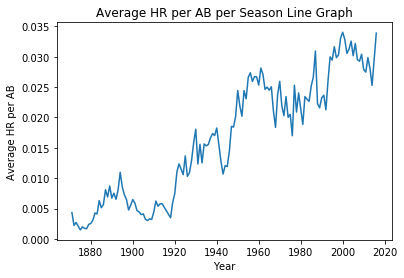

In [33]:
batting_line = batting.groupby(['yearID']).agg({'HR' : 'sum','AB':'sum'}).reset_index()
batting_line['HR/AB']=batting_line['HR']/batting_line['AB']
batting_line.head()
import matplotlib.pyplot as plt
plt.plot(batting_line['yearID'],batting_line['HR/AB'] )
plt.ylabel('Average HR per AB')
plt.xlabel('Year')
plt.title('Average HR per AB per Season Line Graph')
plt.show()